# Qué factores tuvieron más influencia sobre la sobrevivencia de los pasajeros del Titanic?

Algunos módulos no están disposibles a través de la interfaz de Anaconda, y en estos casos se puede hacer una instalacción directa desde el Notebook.

In [1]:
#!conda install -y -c conda-forge plotnine

In [2]:
# módulos estándar
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm
import os

In [3]:
# módulos de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as pn
# import plotly.plotly as py

In [4]:
# config Matplotlib
%matplotlib inline
plt.style.use('ggplot')

# config Seaborn
sns.set_theme(color_codes=True)
sns.set_style("darkgrid") # whitegrid


**Contexto**: Usted es un análista de datos en una empresa de seguros, que está revisando si los datos de pasajeros del Titanic podría ayudarle a entender que características ofrecían mejores chances de sobrevivir a este tipo de tragedias.

**Problema**: Entender cuáles factores tuvieron más impacto en la sobrevivencia de los pasajeros del Titanic.

Para realizar su trabajo, utilizará el archivo `.csv` con datos de los pasajeros del Titanic.

In [5]:
# cargar el dataframe con los datos
df = pd.read_csv('titanic.csv')

**1.** Realicemos un EDA ([Exploratory Data Analysis](https://www.itl.nist.gov/div898/handbook/eda/eda.htm)) para comenzar a entender los datos.

In [6]:
# veamos la lista de variables del dataframe (columnas)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Este es el significado de cada una de las variables del dataframe (o columnas):

|Variable|Significado|Valores|
|---|---|---|
|PassengerId|Identificación del Pasajero|#|
|Survived|Sobrevivió o No?|0=No, 1=Si, vacío=No se sabe|
|Pclass|Clase|1=1ra, 2=2da, 3=3ra|
|Name|Nombre|incluye el Título|
|Sex|Sexo|male, female|
|Age|Edad|en Años|
|SibSp|Hermanos + Conyuge|viaja con hermanos y/o conyuge|
|Parch|Hijos + Padres|viaje con hijos y/o padres|
|Ticket|Número de Tiquete|quienes viajan juntos tienen el mismo tiquete|
|Fare|Tarifa (Costo)|$|
|Cabin|Número de Cabina|indica la Cubierta donde se ubica la Cabina|
|Embarked|Puerto de Embarque|C=Cherbourg, Q=Queenstown, S=Southampton|

In [7]:
# qué datos tenemos en el dataframe?
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
# qué puede decir acerca de los datos en el dataframe?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Ahora utilicemos las herramientas estadísticas básicas para ver que descubrimos:

In [9]:
# agrupemos los sobrevivientes por diferentes variables, y veamos la descripción
df.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1.0,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [10]:
# cálcule algunas medidas estadísticas:
df.groupby('Survived')['Sex'].describe()

,count,unique,top,freq
Survived,,,,
0.0,549,2,male,468
1.0,342,2,female,233


Hasta ahora qué puede decir acerca de los datos? 

**R/**

Se envidencia que hay algunos datos faltantes.

Sobrevivientes agrupados por edad:
 - La mediana de personas que no sobrevieron fueron de 30.626179 años y la cantidad fue de 424.
 - La mediana de personas que sobrevieron fueron de 28.343690 años y la cantidad fue de 290.

Sobrevivientes agrupados por sexo:

 - La cantidad de hombres y mujeres que no sobrevivieron fueron 342 y la mayor parte fue mujeres .
 - La cantidad de hombres y mujeres que sobrevieron fueron 549 y la mayor parte fueron hombres.



In [11]:
# Justificacion de la respuesta
can_m_sobre = 0
can_h_sobre = 0  

for i , j in df.iterrows():
    if j["Sex"]=="female" and j["Survived"]==1:
        can_m_sobre+=1
    elif j["Sex"]=="male" and j["Survived"]==1:
        can_h_sobre+=1
print(f"Cantidad de mujeres que sobrevieron : {can_m_sobre} , cantidad de hombres que sobrevieron {can_h_sobre} cantidad de hombres y mujeres que sobrevieron {can_m_sobre+can_h_sobre}")

Cantidad de mujeres que sobrevieron : 233 , cantidad de hombres que sobrevieron 109 cantidad de hombres y mujeres que sobrevieron 342


Al realizar este analisis se verifica lo que comente con anterioridad

**2.** Continuemos el [EDA](http://analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/) utilizando las herramientas gráficas a nuestra disposición.

<AxesSubplot:>

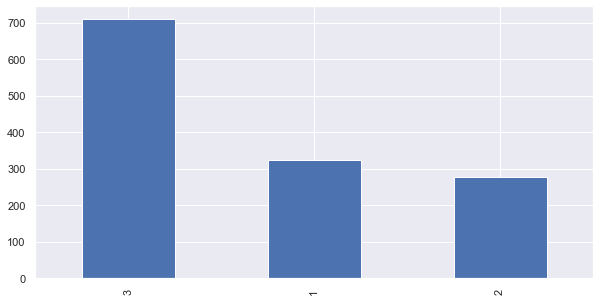

In [12]:
# comencemos con gráficos de barras con la frecuencia de los valores
df['Pclass'].value_counts().plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

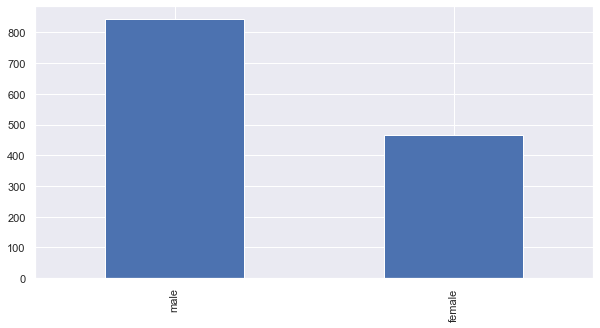

In [13]:
# realice otros gráficos de barras con otras variables:
df['Sex'].value_counts().plot(kind='bar', figsize=(10,5))

Cómo ve las variables hasta el momento, algún _insight_ en particular? 

**R/**

En los datos analizados hay mas hombres que mujeres.

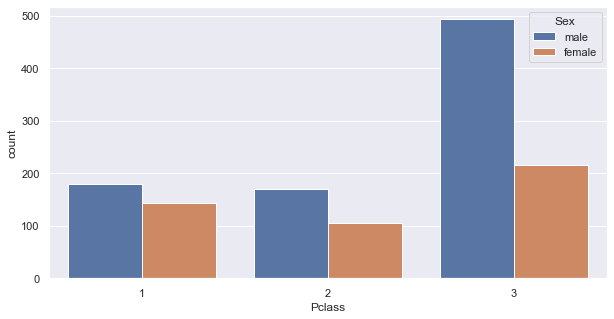

In [14]:
# con los gráficos de barras también es posible cruzar variables:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
g = sns.countplot(ax=ax, data=df, x='Pclass', hue='Sex')

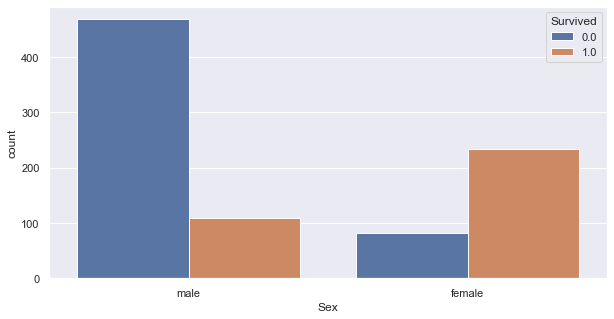

In [15]:
# realice otros gráficos de barras con cruces de variables:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
g = sns.countplot(ax=ax, data=df, x='Sex', hue='Survived')

Qué logró entender con los cruces entre variables? 

**R/**

Grafico de barras cruzando Pclass y Sex : 

- En todas las clases hay mas hombres que mujeres y esto se debe a que en los datos recogidos la cantidad de hombres es mayor que la cantidad de mujeres

- Tambien en la clase 3 hay mas mujeres que en la clase 1 y la clase 2 . Por lo tanto 

- Tambien se observa que la clase 3 hay muchos mas hombres que la clase 1 y clase 2 . Como tambien la suma de la cantidad de hombres de la clase 1 y 2 es menor que la cantidad de hombres de la clase 3.

Grafico de barras cruzando Sex y Survived : 
- La cantidad de hombres que murieron es mayor que la cantidad de mujeres que murieron, pero la cantidad de mujeres que sobrevieron es mayor que la cantidad de hombres que sobrevieron , este tema me parecio interesante porque si habian mas hombres que mujeres , quiza se tiende a pensar que la cantidad de hombres que sobrevieron seria mayor pero al realizar el analisis se da cuenta que no. 

<AxesSubplot:xlabel='Survived', ylabel='Age'>

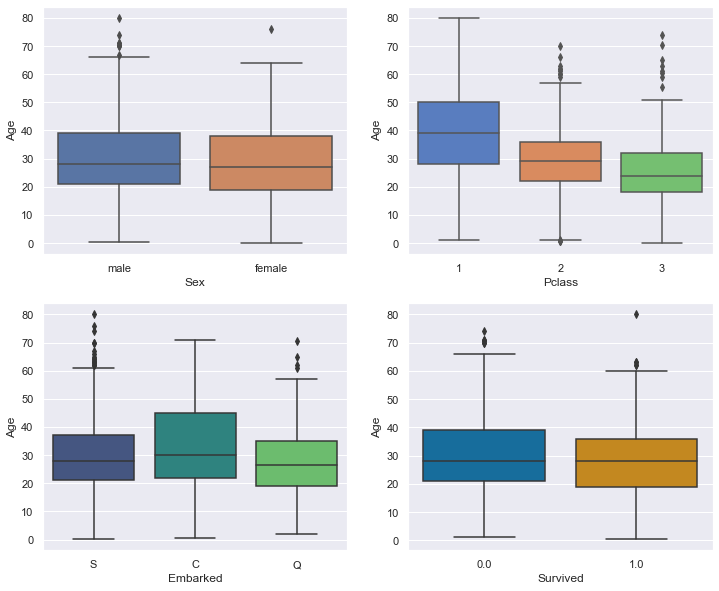

In [16]:
# veamos algunos boxplots de las variables (nos ayudan a identificar outliers)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
sns.boxplot(ax=ax[0,0], data=df, y='Age', x='Sex', palette='deep')
sns.boxplot(ax=ax[0,1], data=df, y='Age', x='Pclass', palette='muted')
sns.boxplot(ax=ax[1,0], data=df, y='Age', x='Embarked', palette='viridis')
sns.boxplot(ax=ax[1,1], data=df, y='Age', x='Survived', palette='colorblind')
# paletas en https://seaborn.pydata.org/tutorial/color_palettes.html

La versión anterior no es muy práctica, refactorice el código para hacerlo más elegante, utilice ciclos por ejemplo.

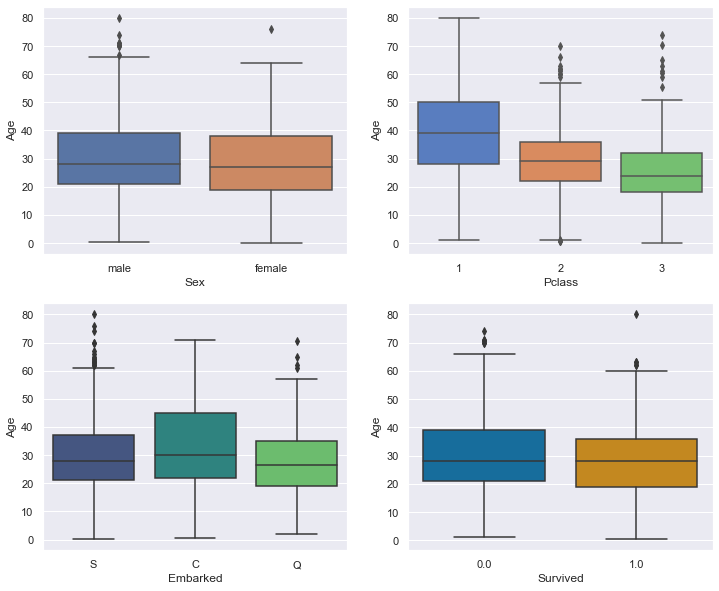

In [17]:
# veamos algunos boxplots de las variables, versión mejorada.
lista = [["Sex","deep",[0,0]],["Pclass","muted",[0,1]],["Embarked","viridis",[1,0]],["Survived","colorblind",[1,1]]]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for i in lista:
    sns.boxplot(ax=ax[i[2][0],i[2][1]],data=df, y='Age', x=i[0], palette=i[1])

Los _boxplots_ le ayudaron a entender algo más? 

**R/**

Ayuda a entender los cruces de cada uno de las variables con la edad , en este caso fue Sexo , Pclass , Embarked y Survived. Mediante a esto comprendemos los valores atipicos , la mediana y los respectivos cuartiles que son muy importantes para tener una mayor comprension. 

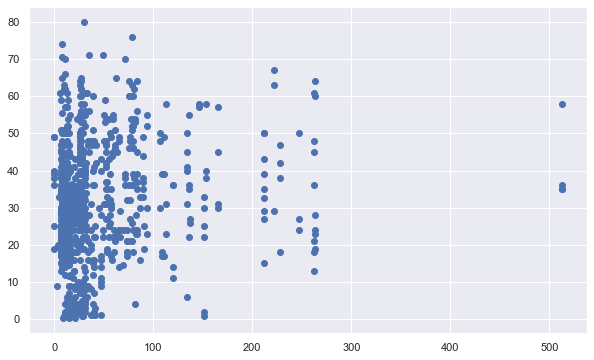

In [18]:
# los scatterplots también son útiles
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Fare'], df['Age'])
plt.show()

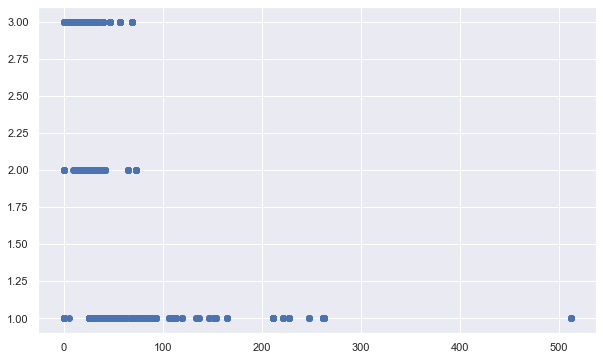

In [19]:
# ensaye con otros scatterpots:
# los scatterplots también son útiles
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Fare'], df['Pclass'])
plt.show()

Fueron útiles los _scatterplots_, qué logró entender con ellos? 

**R/**

Fare y Age: 
- En las tarifas mas bajas hay una mayor cantidad de personas , entre los 30 y los 40 y los otros entre los 60. 


<AxesSubplot:xlabel='Age', ylabel='Density'>

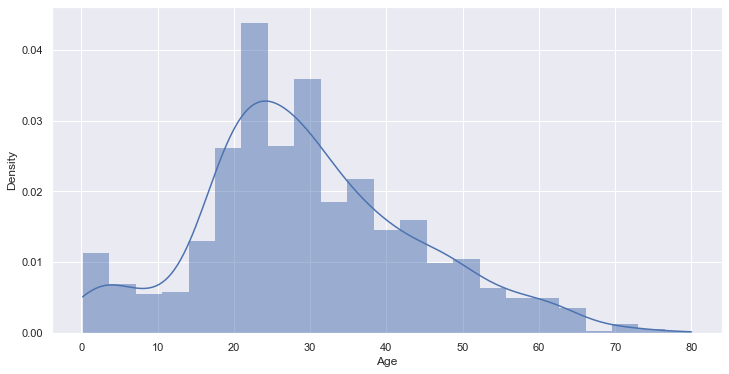

In [20]:
# ahora utilicemos un histograma para entender mejor la distribución de los datos
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(df["Age"].dropna(), ax=ax, kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

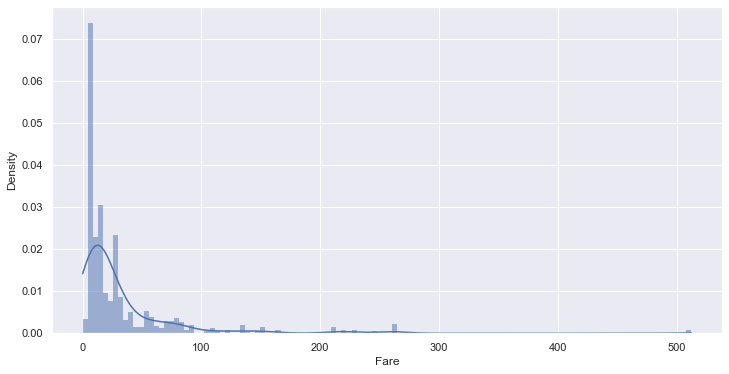

In [21]:
# revise los histogramas/distribuciones de otras variables
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(df["Fare"].dropna(), ax=ax, kde=True, stat="density", linewidth=0)
#Densidad cuantas personas hay

Qué nuevo entendimiento de los datos logró gracias a los histogramas/distribuciones? 

**R/**

Edad: 
- La densidad representa la cantidad de personas que se encuentran estan en la cantidad de años que es el eje x.

Fare: 
- Como se puede observar la mayor parte de las personas pagaron una tarifa muy baja en comparacion con las otras personas.

Es muy usual que los datos no estén completos, veamos cómo están los datos del Titanic y veamos qué hacer al respecto.

<AxesSubplot:>

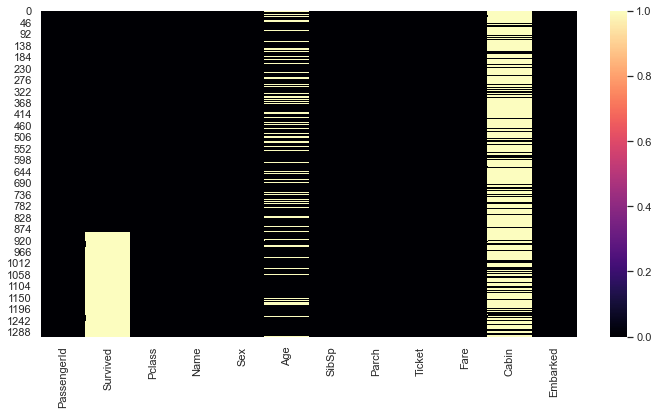

In [22]:
# veamos (usando Seaborn) qué valores que hacen falta
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.isnull(), cmap='magma', ax=ax)
# la escala y los valores de y no tiene mucho sentido, puede quitarlos con: yticklabels=False, cbar=False
# para las opciones de cmap: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Cuál es la mejor estrategia para completar los valores faltantes?

**R/**

La mejor estrategia para completar los datos faltantes es realizar una matriz de correlacion en donde se pueda inferir con que columna de datos tiene mayor relacion y menor relacion esos datos faltantes , luego se debe de realizar un proceso para sacar la media con la que tenga mayor correlacion y agregar asi los datos faltantes eso si depende, por ejemplo si la edad tiene una fuerte correlacion con Pclass se debe de sacar la media de cada una de las clases y luego si agregar el valor dato que falta del año que esta relacionado con esa clase.

Cómo se asegura que al adicionar los valores faltantes no se altera _el total_? es decir, se mantienen lo más parecidos a los datos reales.

**R/**

Porque se esta haciendo un analisis de correlacion para saber con cual columna de datos tiene mayor correlacion esa columna que tiene datos faltantes , si tiene mucha correlacion significa que estan muy relacionados por lo tanto si se llenan los datos faltantes con esas correlacion aseguramos que no se va a alterar el total.

**3.** Antes de completar los datos faltantes, vamos a transformar un poco los datos:
- `Ticket` no es muy útil pero, si se repite nos indica cuantas persona viajan juntas (con el mismo tiquete).
- `Cabin` no dice mucho, pero la primera letra indica la cubierta en la que se encontraba (o desconocida).
- `Sex` podría convertirse a numérica: 0=`female`, 1=`male`
- `Embarked` también puede ser numérica: 0=`Cherbourg`, 1=`Queenstown`, 2=`Southampton`
- `Name` tampoco, pero se puede obtener el título de la persona: señor, señora, señorita, 

**3.1.** `Ticket` → `Contador`

In [23]:
# vamos a contar cuántas veces se repite el mismo tiquete:
df['Contador'] = df.groupby('Ticket')['Ticket'].transform('count')

In [24]:
# veamos el resultado, ordenado por la nueva columna:
df.sort_values(by=['Contador'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Contador
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
734,735,0.0,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S,1
738,739,0.0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S,1
739,740,0.0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S,1
740,741,1.0,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.0000,D45,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1257,NaN,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.5500,NaN,S,11
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,11
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S,11


In [25]:
# hagamos un conteo:
df['Contador'].value_counts()

1     713
2     264
3     147
4      64
5      35
7      35
6      24
8      16
11     11
Name: Contador, dtype: int64

cuántos pasajeros viajaban solos, y cuántos en grupo? 

**R/**

La cantidad de pasajeros que viajan solos son 713 y el resto viaja en grupo

cuántos grupos tenían 4 personas y cuántos grupos tenían 7 personas? 

**R/**

La cantidad de grupos de 4 personas que hay son 16 grupos .

La cantidad de grupos de 7 personas que hay son 5 grupos .


**3.2.** `Cabin` → `Cubierta`

In [26]:
# como tenemos cabinas sin valor, vamos a llenarlas con una X de desconocido
df['Cabin'].fillna("X", inplace=True)

In [27]:
# vamos asignar la Cubierta a partir de la primera letra de 'Cabin'
df['Cubierta'] = df['Cabin'].map(lambda x : x[0])

In [28]:
# hagamos un conteo:
df['Cubierta'].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cubierta, dtype: int64

In [29]:
# diccionario para convertir cada Cubierta en un numero: 'A'=1 .. 'G'=7 ... cualquier otro valor es 8
#cubierta = {"A": 1, ... "X": 8, 'T': 8}
cubierta = {"A": 1,
            "B":2,
            "C":3,
            "D":4,
            "E":5,
            "F":6,
            "G":7,
            "X": 8,
            'T': 8}

# hagamos la conversión:
df['Cubierta'] = df["Cubierta"].map(cubierta).astype(int)  # recuerde el .astype(int) al final

In [30]:
# hagamos un conteo:
df['Cubierta'].value_counts()

8    1015
3      94
2      65
4      46
5      41
1      22
6      21
7       5
Name: Cubierta, dtype: int64

cómo interpreta estos datos? 

**R/**

Rellenamos las cabinas que no tenian ningun valor en este caso dio un total de 1015 cabinas que no tenian ningun valor, con esto rellenamos los datos

- La cabina A tiene una cantidad de 22 pasajeros
- La cabina B tiene una cantidad de 65 pasajeros
- La cabina C tiene una cantidad de 94 pasajeros
- La cabina D tiene una cantidad de 46 pasajeros
- La cabina E tiene una cantidad de 41 pasajeros
- La cabina F tiene una cantidad de 21 pasajeros
- La cabina G tiene una cantidad de 5 pasajeros
- La cabina X Y T tiene una cantidad de 1015 pasajeros.



**3.3.** `Sex` → `Sex`

In [31]:
# convierta la columna 'Sex' con valores 'female' y 'male', en 0 y 1 respectivamente
sexo = {
    "female":0,
    "male":1
}
df['Sex_num'] = df["Sex"].map(sexo).astype(int)  # recuerde el .astype(int) al final

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Contador,Cubierta,Sex_num
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,1,8,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,3,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,1,8,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,3,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,X,S,1,8,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3,3,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,X,S,1,8,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,X,S,1,8,1


**3.4.** `Embarked` → `Embarked`

In [33]:
#Colocamos los valores vacios con una X
df['Embarked'].fillna('X', inplace=True)

In [34]:
# convierta la columna 'Embarked' con valores 0=Cherbourg, 1=Queenstown, 2=Southampton
embarked = {
    "C":0,
    "Q":1,
    "S":2,
    'X':3
} 
df['Embarked_num'] = df["Embarked"].map(embarked).astype(int)  # recuerde el .astype(int) al final

In [35]:
#Mostrar los valores unicos de una columna 
df['Embarked_num'].unique().tolist()

[2, 0, 1, 3]

**3.5.** `Name` → `Titulo`

In [36]:
# convierta la columna 'Name' para sacar solo el título de la persona:
# separe por ',', tome el segundo valor, y separe luego por '.' para sacar el primer valor, quite los espacios:
df['Titulo'] = df['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip() )

In [37]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Contador,Cubierta,Sex_num,Embarked_num,Titulo
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,1,8,1,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,3,0,0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,1,8,0,2,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,3,0,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,1,8,1,2,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,X,S,1,8,1,2,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3,3,0,0,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,X,S,1,8,1,2,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,X,S,1,8,1,2,Mr


In [38]:
# hagamos un conteo:
df['Titulo'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Sir               1
Mme               1
Jonkheer          1
Capt              1
Lady              1
the Countess      1
Don               1
Dona              1
Name: Titulo, dtype: int64

Hay demasiados Titulos, vamos reducirlos a `Mr`, `Mrs`, `Miss` y `Otro`. Para estos debemos ver cuales corresponde a títulos masculinos y cuales a femeninos.

In [39]:
# creemos una tabla cruzada de 'Titulo' por 'Sex'
pd.crosstab(df['Titulo'], df['Sex'])

Sex,female,male
Titulo,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


Vamos a convertir: `Master` a `Mr` (Señor), `the Countess` y `Mme` a `Mrs` (Señora), `Lady`, `Mlle` y `Ms` a `Miss` (Señorita), y los demás a `Otro`.

In [40]:
# creemos las listas para las sustituciones:
lst_Mr = ['Master']
lst_Mrs = ['the Countess', 'Mme','Dona']
lst_Miss = ['Lady','Mlle','Ms']
lst_Otro = ['Capt','Col','Don','Jonkheer','Dr','Major','Rev','Sir']
# cambiemos los títulos:
lista_titulos = [[lst_Mr,'Mr'],[lst_Mrs,'Mrs'],[lst_Miss,'Miss'],[lst_Otro,'Otro']]
df['Titulo'] = df['Titulo'].replace(lst_Mr, 'Mr')
for i in lista_titulos:
    df['Titulo'] = df['Titulo'].replace(i[0], i[1])

In [41]:
# ahora convertimos los títulos a valores numéricos: 0='Mr', 1='Mrs', 2='Miss', 3='Otro'
titulos = {
    "Mr":0,
    "Mrs":1,
    "Miss":2,
    "Otro":3
} 
df['titulos_num'] = df["Titulo"].map(titulos).astype(int)  # recuerde el .astype(int) al final

In [42]:
df['titulos_num'].unique().tolist()

[0, 1, 2, 3]

**4.** Vamos a completar los datos faltantes:

In [43]:
# Cuántos datos hacen falta en la columna Age?
df['Age'].isnull().sum()

263

Cúal es la estrategia para completar los datos de la edad? 

**R/**

La estrategia es desarrollar un mapa de correlacion para saber como debo de calcular los promedios para poder asi calcular la edad


In [44]:
#m_corr = df[['Age','Pclass','Embarked_num','Sex_num','Cubierta']].corr()
m_corr = df.corr()
m_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Contador,Cubierta,Sex_num,Embarked_num,titulos_num
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428,-0.010350,-0.009451,0.013406,-0.052892,-0.033155
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.064962,-0.294804,-0.543351,-0.163517,0.428661
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.078554,0.731826,0.124617,0.182154,-0.131038
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.185284,-0.313538,0.063645,-0.076678,-0.074065
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,0.679444,0.007649,-0.109609,0.064519,0.088285
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,0.647029,-0.033621,-0.213125,0.043835,0.128496
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,0.478940,-0.550088,-0.185523,-0.235763,0.155775
Contador,-0.010350,0.064962,-0.078554,-0.185284,0.679444,0.647029,0.478940,1.000000,-0.104015,-0.172765,0.012716,0.125032
Cubierta,-0.009451,-0.294804,0.731826,-0.313538,0.007649,-0.033621,-0.550088,-0.104015,1.000000,0.121842,0.229208,-0.111903
Sex_num,0.013406,-0.543351,0.124617,0.063645,-0.109609,-0.213125,-0.185523,-0.172765,0.121842,1.000000,0.095215,-0.814897


Como se puede observar con la variable que tiene relacion la edad es con Pclass para ello se debe de sacar el promedio de cada clase y rellenar las edades que hacen falta con esa edad promedio en cada clase , para poder asi no alterar los datos

In [45]:
# Sacamos el promedio del sexo de hombre y de mujeres respectivamente y luego si aplicarlo
# completemos los datos de la edad:
df_m = df.groupby('Sex')['Age']
df_m.mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [46]:
for i,j in df.iterrows():
    if np.isnan(j["Age"])==True:
        if j["Sex"]=="female":
            df.at[i,'Age']=28.687088
        else:
            #df.loc[[i]]["Age"] =30.585228
            df.at[i,'Age']=30.585228

In [47]:
df["Age"]

0       22.000000
1       38.000000
2       26.000000
3       35.000000
4       35.000000
          ...    
1304    30.585228
1305    39.000000
1306    38.500000
1307    30.585228
1308    30.585228
Name: Age, Length: 1309, dtype: float64

In [48]:
df["Age"]

0       22.000000
1       38.000000
2       26.000000
3       35.000000
4       35.000000
          ...    
1304    30.585228
1305    39.000000
1306    38.500000
1307    30.585228
1308    30.585228
Name: Age, Length: 1309, dtype: float64

In [49]:
df['Age'].isnull().sum()

0

In [50]:
# Cuántos datos hacen falta en la columna Cabin?
df['Cabin'].isnull().sum()

0

Pero ya no estamos usando `Cabin`, en la conversión a `Cubierta`, ya no tenemos datos faltantes:

In [51]:
# verifique si hay datos faltates en la columna Cubierta?
df['Cubierta'].isnull().sum()

0

In [52]:
# Cuántos datos hacen falta en la columna Embarked?
df['Embarked'].isnull().sum()

0

El resultado fue 0 porque con anterioridad para hacer el mapa de correlacion entre edad y las otras variables llene los datos faltantes con una X , por lo tanto en si los datos que estaban faltantes los rellene con una X ahora faltaria completar esos datos que ahora estan como X de la mejor manera para no alterar las estadisticas

Cúal es la estrategia para completar los datos del puerto de embarque? 

**R/**

Como apenas son dos valores , entonces se los asigno al que tiene mas poblacion

In [53]:
# Antes de completar
df["Embarked"].value_counts()

S    914
C    270
Q    123
X      2
Name: Embarked, dtype: int64

In [54]:
# completemos los datos de Embarked:
df["Embarked"] = df["Embarked"].apply( lambda row: "S" if row=="X" else row)
#df['Embarked'] = df['Embarked'].map(lambda x : "S" if x == "X" else x)


In [55]:
# Despues de completar
df["Embarked"].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [56]:
# así quedaron los datos:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Contador,Cubierta,Sex_num,Embarked_num,Titulo,titulos_num
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,X,S,1,8,1,2,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,3,0,0,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,X,S,1,8,0,2,Miss,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,3,0,2,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,X,S,1,8,1,2,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,30.585228,0,0,A.5. 3236,8.0500,X,S,1,8,1,2,Mr,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,3,3,0,0,Mrs,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,X,S,1,8,1,2,Mr,0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,30.585228,0,0,359309,8.0500,X,S,1,8,1,2,Mr,0


Después de la conversión de valores, y completar los faltantes, hay columnas que no necesitamos.

In [57]:
# Elimina la columnas que no son necesarias:
dfa = df.drop(['SibSp','Parch','Contador','PassengerId','Embarked','Sex','Cabin','Titulo','Ticket'], axis='columns')
#df.drop(['Parch'], axis=1)
#df.drop(['Contador'], axis=1)


In [58]:
# así quedaron los datos:
dfa

,Survived,Pclass,Name,Age,Fare,Cubierta,Sex_num,Embarked_num,titulos_num
0,0.0,3,"Braund, Mr. Owen Harris",22.000000,7.2500,8,1,2,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,71.2833,3,0,0,1
2,1.0,3,"Heikkinen, Miss. Laina",26.000000,7.9250,8,0,2,2
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,53.1000,3,0,2,1
4,0.0,3,"Allen, Mr. William Henry",35.000000,8.0500,8,1,2,0
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",30.585228,8.0500,8,1,2,0
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",39.000000,108.9000,3,0,0,1
1306,NaN,3,"Saether, Mr. Simon Sivertsen",38.500000,7.2500,8,1,2,0
1307,NaN,3,"Ware, Mr. Frederick",30.585228,8.0500,8,1,2,0


**5.** Ahora si, a analizar los datos.

In [59]:
# veamos la supervivencia de acuerdo a la edad
dftemp = dfa.groupby('Survived')['Age']
dftemp.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,549.0,30.558079,12.455802,1.00,23.0,30.585228,35.0,74.0
1.0,342.0,28.484704,13.772160,0.42,21.0,28.687088,35.0,80.0


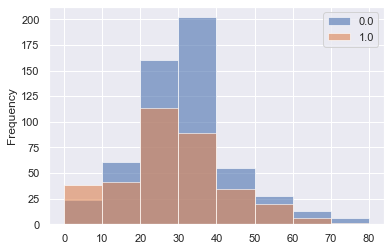

In [60]:
ax1, ax2 = dftemp.plot(kind='hist', legend=True, alpha=0.6, bins=range(0, 90, 10))
#ax1.legend(['No', 'Yes'], title='Survived', loc='upper right')

In [61]:
# veamos la supervivencia según el genero
dfa.groupby('Survived')['Sex_num'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,549.0,0.852459,0.354968,0.0,1.0,1.0,1.0,1.0
1.0,342.0,0.318713,0.466660,0.0,0.0,0.0,1.0,1.0


Complete el análisis ...

In [62]:
m_corr = dfa[['Age', 'Pclass', 'Cubierta', 'Sex_num','Embarked_num']].corr()
m_corr

,Age,Pclass,Cubierta,Sex_num,Embarked_num
Age,1.000000,-0.365674,-0.294777,0.070540,-0.067264
Pclass,-0.365674,1.000000,0.731826,0.124617,0.182154
Cubierta,-0.294777,0.731826,1.000000,0.121842,0.229208
Sex_num,0.070540,0.124617,0.121842,1.000000,0.095215
Embarked_num,-0.067264,0.182154,0.229208,0.095215,1.000000


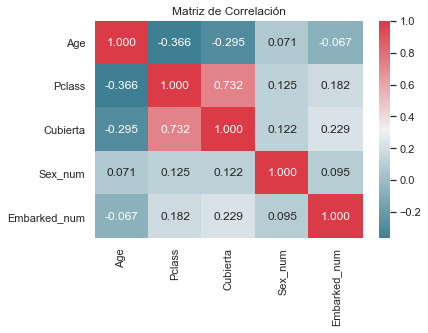

In [63]:
# realizar el mapa de calor (heatmap, seaborn)
sns.heatmap(m_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),annot=True,fmt='.3f')
#annot = mostrar valores
# fmt = redondear esos valores  a 3 decimales

plt.title("Matriz de Correlación");

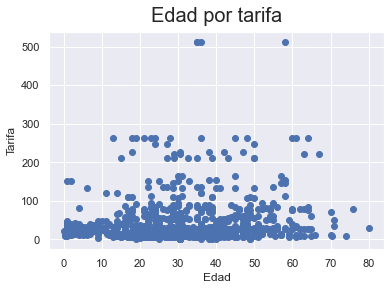

In [64]:
# crear un diagrama de dispersión (scatter plot, pyplot) del año por Tarifa
plt.scatter(dfa['Age'], df['Fare'])
# adicione titulo del diagrama y los ejes
plt.title("Edad por tarifa", fontsize=20, verticalalignment='bottom')
plt.xlabel("Edad")
plt.ylabel("Tarifa");

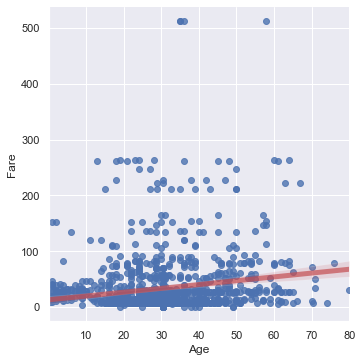

In [65]:
# crear un diagrama de dispersión (lmplot, seaborn) del pago_anual por edad
sns.lmplot(data=dfa, x='Age', y='Fare', line_kws={"color":"r","alpha":0.7,"lw":5});

Como se puede observar entre mas edad mayor es la tarifa en conclusion mas paga

Qué puede concluir?

**R/**

Al realizar la limpieza de datos podemos observar que hay una correlacion muy alta entre la edad y el sexo (0=female y 1=male) , como ya se habia evidenciado con anterioridad.